In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv("House Prices.csv")
df = df.drop(['ID','Date','zipcode','Floors','Lat','Long'], axis=1)

In [3]:
x = df[['Sqft_living', 'Bedrooms', 'Bathrooms' ]]
y = df['Price']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [5]:
#mertrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.46386621769354963
Mean Squared Error: 64148882088.93926


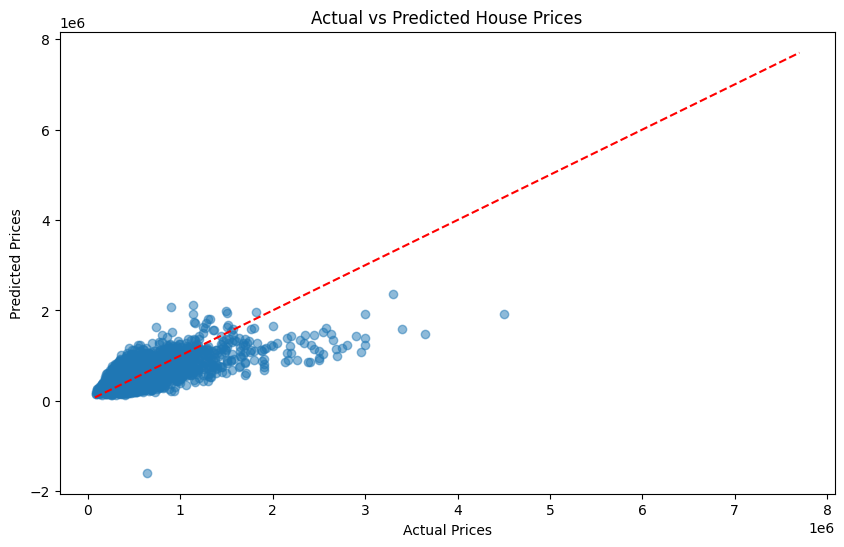

In [6]:
#actual vs predicted
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')  
plt.title('Actual vs Predicted House Prices')
plt.show()

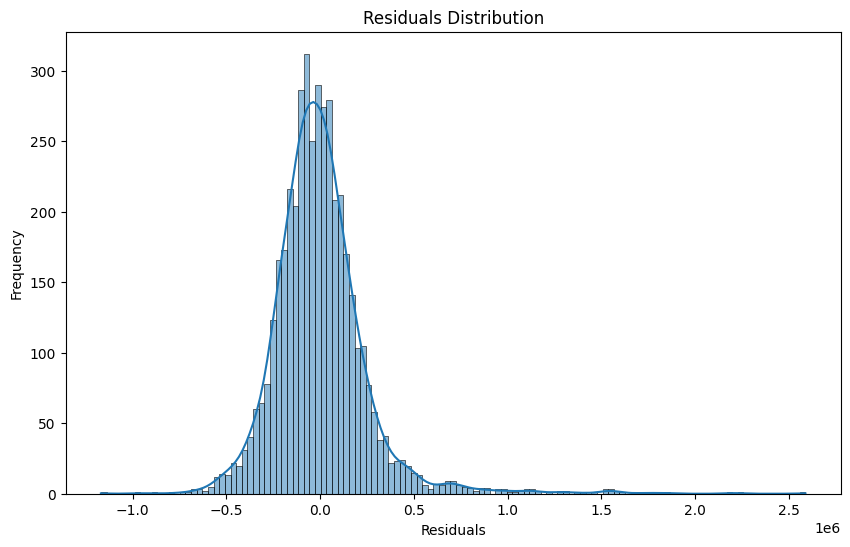

In [7]:
#residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)   
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

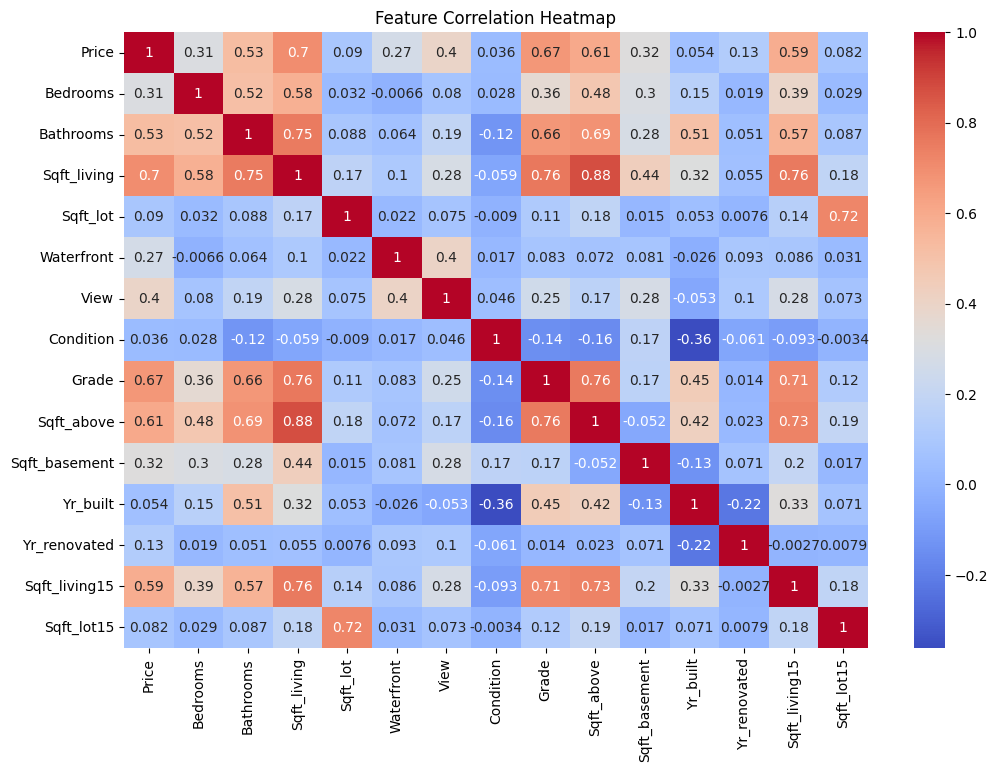

In [8]:
#feature correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

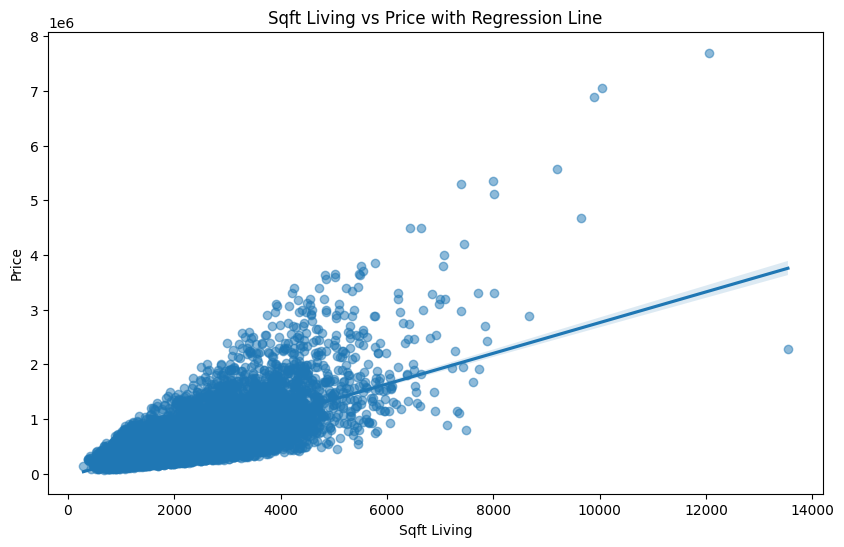

In [9]:
#sqft_living vs price with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Sqft_living', y='Price', data=df, scatter_kws={'alpha':0.5})
plt.title('Sqft Living vs Price with Regression Line')  
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

In [10]:
y_pred = model.predict(x_test)

In [11]:
y_pred

array([ 329627.55197476,  273441.54806865,  436803.21360188, ...,
       1243904.44475583,  205770.23236656,  785805.04739157])

In [12]:
# Step 6: Evaluate
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 64148882088.93926
R² Score: 0.46386621769354963
Coefficients: [   320.31699124 -66861.8206194    6040.71702147]
Intercept: 86809.07332782581


In [13]:
new_house = pd.DataFrame({'Sqft_living': [5000], 'Bedrooms': [8], 'Bathrooms': [4]})
predicted_price = model.predict(new_house)

In [14]:
# Result
print("Predicted Price for new house:", predicted_price[0])

Predicted Price for new house: 1177662.3326667065


In [15]:
import speech_recognition as sr
import pandas as pd
import re
import pyttsx3
from sklearn.linear_model import LinearRegression

In [16]:
# Sample data to train
data = pd.DataFrame({
    'Size': [2000, 1500, 1800, 2200],
    'Bedrooms': [3, 2, 3, 4],
    'Age': [10, 15, 5, 8],
    'Price': [500000, 300000, 400000, 550000]
})

In [17]:
X = data[['Size', 'Bedrooms', 'Age']]
y = data['Price']

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Speak output
engine = pyttsx3.init('sapi5')

def speak(text):
    print("Bot:", text)
    engine.say(text)
    engine.runAndWait()

In [22]:
# Speech to text
recognizer = sr.Recognizer()

try:
    with sr.Microphone() as source:
        recognizer.adjust_for_ambient_noise(source)
        print("Listening...")
        audio = recognizer.listen(source)

        text = recognizer.recognize_google(audio)
        print("You said:", text)

        # Flexible patterns for number extraction
        size = re.search(r'(\d+)\s*(size|square feet|sqft|square)?', text)
        bedrooms = re.search(r'(\d+)\s*(bedroom|bedrooms)?', text)
        age = re.search(r'(\d+)\s*(age|year|years)?', text)

        if size and bedrooms and age:
            size_val = int(size.group(1))
            bedrooms_val = int(bedrooms.group(1))
            age_val = int(age.group(1))

            input_data = pd.DataFrame({'Size': [size_val], 'Bedrooms': [bedrooms_val], 'Age': [age_val]})
            predicted_price = model.predict(input_data)[0]
            speak(f"Estimated house price is {round(predicted_price)} rupees.")
        else:
            speak("Sorry, I could not understand size, bedrooms, and age from what you said.")

except sr.UnknownValueError:
    speak("Sorry, I could not understand your voice.")
except sr.RequestError:
    speak("Sorry, there was an issue with the speech recognition service.")
except Exception as e:
    speak(f"Error: {e}")

Listening...
You said: 5500 square feet
Bot: Estimated house price is -272600000 rupees.
